
# üìò Projeto 1 - Teoria e Aplica√ß√£o de Grafos (TAG) - 2025/2
**Universidade de Bras√≠lia - Departamento de Ci√™ncia da Computa√ß√£o**  
**Professor:** D√≠bio  
**Tema:** An√°lise de Rede Social do Facebook  
**Integrantes:**  
- Gustavo Choueiri - 232014010  
- Giovanni Daldegan - 232002520  

---
Este notebook realiza a an√°lise de uma rede social (Facebook), utilizando conceitos de **Teoria dos Grafos**.
As etapas seguem rigorosamente as instru√ß√µes do projeto:

1. Coleta de dados (2000 n√≥s aleat√≥rios)  
2. Constru√ß√£o e an√°lise do grafo  
3. Detec√ß√£o de comunidades (Louvain)  
4. C√°lculo de medidas de centralidade  
5. Visualiza√ß√£o dos resultados  
6. Interpreta√ß√£o e relat√≥rio  


In [2]:

import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random, os, warnings

warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")

print("Bibliotecas carregadas com sucesso.")


Bibliotecas carregadas com sucesso.



## üß© Etapa 1: Coleta de Dados
Selecionamos 2000 n√≥s aleat√≥rios


In [ ]:

def coletar_dados_facebook(diretorio_dados="dados_facebook", num_nos=2000):
    arquivos_edges = [f for f in os.listdir(diretorio_dados) if f.endswith('.edges')]
    todos_nos, todas_arestas = set(), []

    for arquivo in arquivos_edges:
        with open(os.path.join(diretorio_dados, arquivo), 'r') as f:
            for linha in f:
                n = linha.strip().split()
                if len(n) == 2:
                    n1, n2 = map(int, n)
                    todos_nos.update([n1, n2])
                    todas_arestas.append((n1, n2))

    random.seed(42)
    nos_sel = set(random.sample(list(todos_nos), min(num_nos, len(todos_nos))))
    arestas_filtradas = [(n1, n2) for n1, n2 in todas_arestas if n1 in nos_sel and n2 in nos_sel]

    G = nx.Graph()
    G.add_nodes_from(nos_sel)
    G.add_edges_from(arestas_filtradas)
    return G


G = coletar_dados_facebook()
G



## üîç Etapa 2: An√°lise do Grafo
Calculamos propriedades b√°sicas do grafo


In [8]:

def analisar_grafo(G):
    componentes = list(nx.connected_components(G))
    componente_gigante = max(componentes, key=len)
    G_gigante = G.subgraph(componente_gigante).copy()
    densidade = nx.density(G_gigante)

    print(f"N√≥s: {G_gigante.number_of_nodes()}, Arestas: {G_gigante.number_of_edges()}, Densidade: {densidade:.4f}")
    return G_gigante

G = analisar_grafo(G)


N√≥s: 1765, Arestas: 21625, Densidade: 0.0139



## üß† Etapa 3: Detec√ß√£o de Comunidades
Utilizamos o algoritmo de **Louvain** para detectar agrupamentos de usu√°rios.


In [11]:

def detectar_comunidades(G):
    comunidades = nx.community.louvain_communities(G, seed=42)
    comunidades_dict = {no: i for i, c in enumerate(comunidades) for no in c}
    return comunidades_dict, comunidades

comunidades_dict, comunidades = detectar_comunidades(G)
comunidades_dict
comunidades


[{1,
  10,
  13,
  16,
  26,
  29,
  30,
  36,
  38,
  45,
  53,
  56,
  57,
  60,
  62,
  63,
  66,
  77,
  81,
  85,
  87,
  92,
  94,
  96,
  103,
  104,
  108,
  109,
  117,
  118,
  119,
  121,
  125,
  126,
  130,
  133,
  135,
  139,
  141,
  142,
  158,
  159,
  160,
  164,
  168,
  169,
  170,
  172,
  176,
  185,
  186,
  188,
  194,
  196,
  197,
  200,
  208,
  212,
  213,
  221,
  222,
  224,
  232,
  238,
  240,
  248,
  250,
  251,
  252,
  257,
  260,
  266,
  269,
  271,
  274,
  280,
  285,
  288,
  290,
  291,
  294,
  295,
  297,
  298,
  299,
  303,
  304,
  308,
  311,
  313,
  314,
  315,
  320,
  324,
  325,
  329,
  330,
  331,
  340,
  342,
  344,
  346,
  347},
 {348,
  349,
  357,
  360,
  362,
  363,
  365,
  369,
  371,
  375,
  385,
  387,
  388,
  389,
  390,
  394,
  396,
  397,
  398,
  402,
  404,
  410,
  411,
  412,
  413,
  416,
  418,
  420,
  421,
  423,
  424,
  426,
  428,
  429,
  432,
  433,
  434,
  435,
  436,
  438,
  439,
  448,
  449,
  


## ‚öôÔ∏è Etapa 4: Medidas de Centralidade
As medidas ajudam a identificar usu√°rios **influentes**, **mediadores** e **bem conectados**.


In [18]:

def calcular_centralidades(G):
    return {
        'grau': nx.degree_centrality(G),
        'intermediacao': nx.betweenness_centrality(G),
        'proximidade': nx.closeness_centrality(G),
        'autovetor': nx.eigenvector_centrality(G, max_iter=1000)
    }

medidas = calcular_centralidades(G)
medidas


{'grau': {1: 0.005668934240362812,
  10: 0.002834467120181406,
  13: 0.007936507936507936,
  16: 0.002834467120181406,
  26: 0.021541950113378686,
  29: 0.0022675736961451248,
  30: 0.005668934240362812,
  36: 0.002834467120181406,
  38: 0.0017006802721088437,
  45: 0.0034013605442176874,
  53: 0.007936507936507936,
  56: 0.02380952380952381,
  57: 0.002834467120181406,
  60: 0.002834467120181406,
  62: 0.006235827664399093,
  63: 0.0022675736961451248,
  66: 0.0034013605442176874,
  77: 0.0011337868480725624,
  81: 0.0005668934240362812,
  85: 0.002834467120181406,
  87: 0.002834467120181406,
  92: 0.005668934240362812,
  94: 0.005102040816326531,
  96: 0.0034013605442176874,
  103: 0.005102040816326531,
  104: 0.009070294784580499,
  107: 0.010204081632653062,
  108: 0.0034013605442176874,
  109: 0.012471655328798186,
  117: 0.0022675736961451248,
  118: 0.010204081632653062,
  119: 0.015306122448979591,
  121: 0.0017006802721088437,
  125: 0.0017006802721088437,
  126: 0.00113378684


## üé® Etapa 5: Visualiza√ß√µes
A seguir, criamos diferentes gr√°ficos


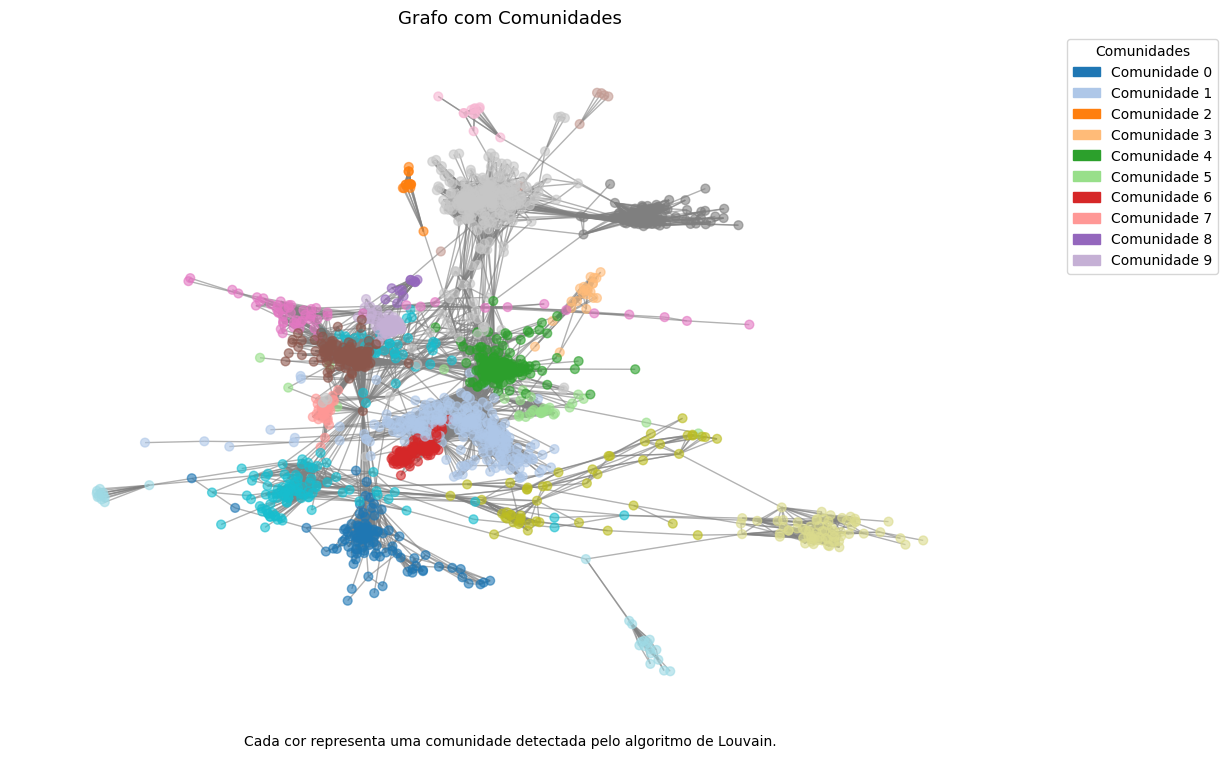

In [ ]:
import matplotlib.patches as mpatches

def visualizar_grafo_comunidades(G, comunidades_dict, titulo="Grafo com Comunidades"):

    plt.figure(figsize=(10, 7))

    comunidades_unicas = sorted(set(comunidades_dict.values()))
    num_comunidades = len(comunidades_unicas)
    cores = plt.cm.tab20(np.linspace(0, 1, num_comunidades))

    # Mapeia cada n√≥ para a cor de sua comunidade
    cores_nos = [cores[comunidades_dict[no] % len(cores)] for no in G.nodes()]
    pos = nx.spring_layout(G, seed=42)

    nx.draw(G, pos, node_color=cores_nos, node_size=40, edge_color='gray', alpha=0.6)
    plt.title(titulo, fontsize=13)

    # Cria legendas autom√°ticas
    patches = []
    for i, c in enumerate(comunidades_unicas[:10]):
        patches.append(mpatches.Patch(color=cores[i], label=f"Comunidade {c}"))
    plt.legend(handles=patches, title="Comunidades", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.figtext(0.5, -0.02, "Cada cor representa uma comunidade detectada pelo algoritmo de Louvain.", ha="center")
    plt.tight_layout()
    plt.show()

visualizar_grafo_comunidades(G,comunidades_dict)


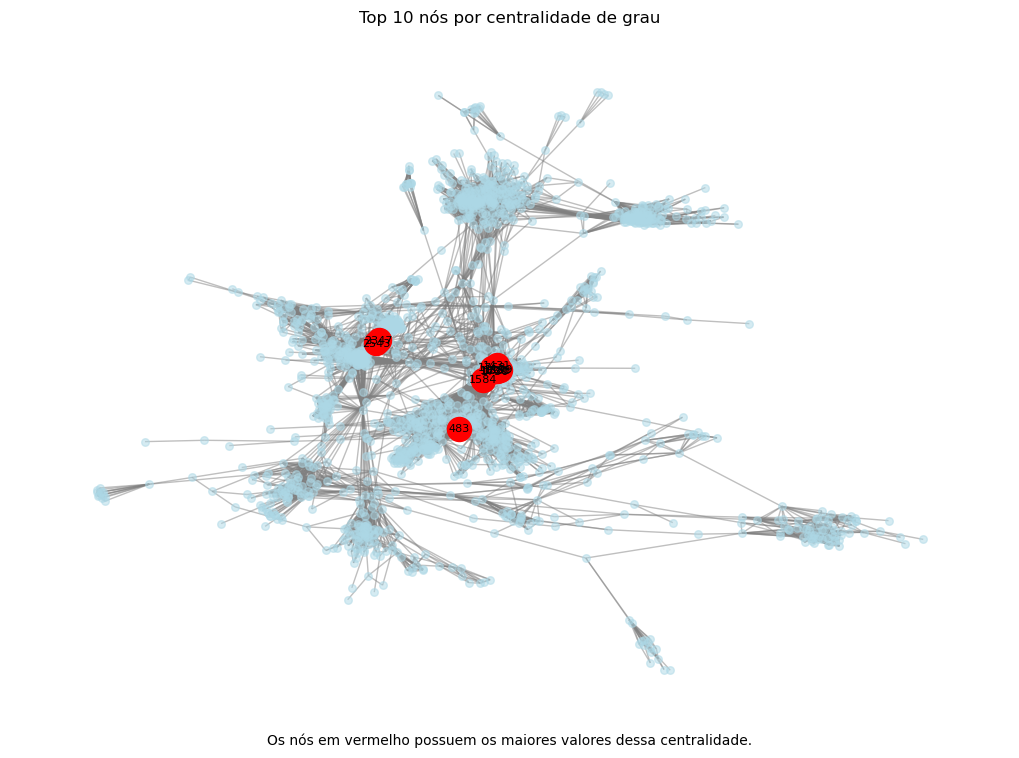

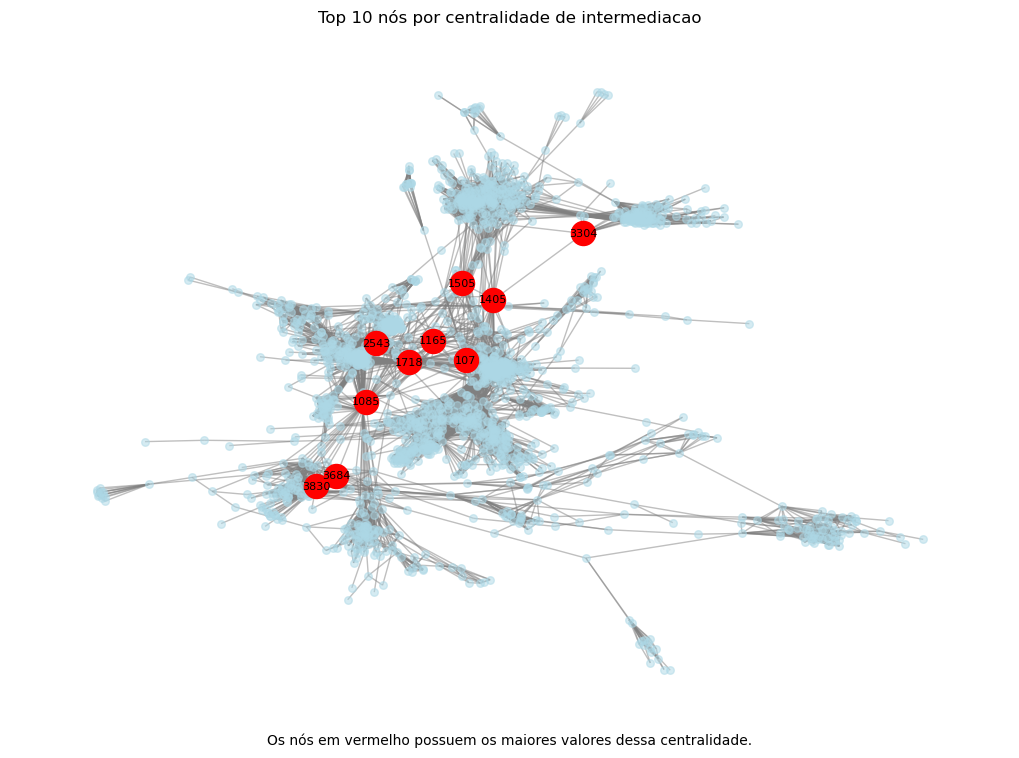

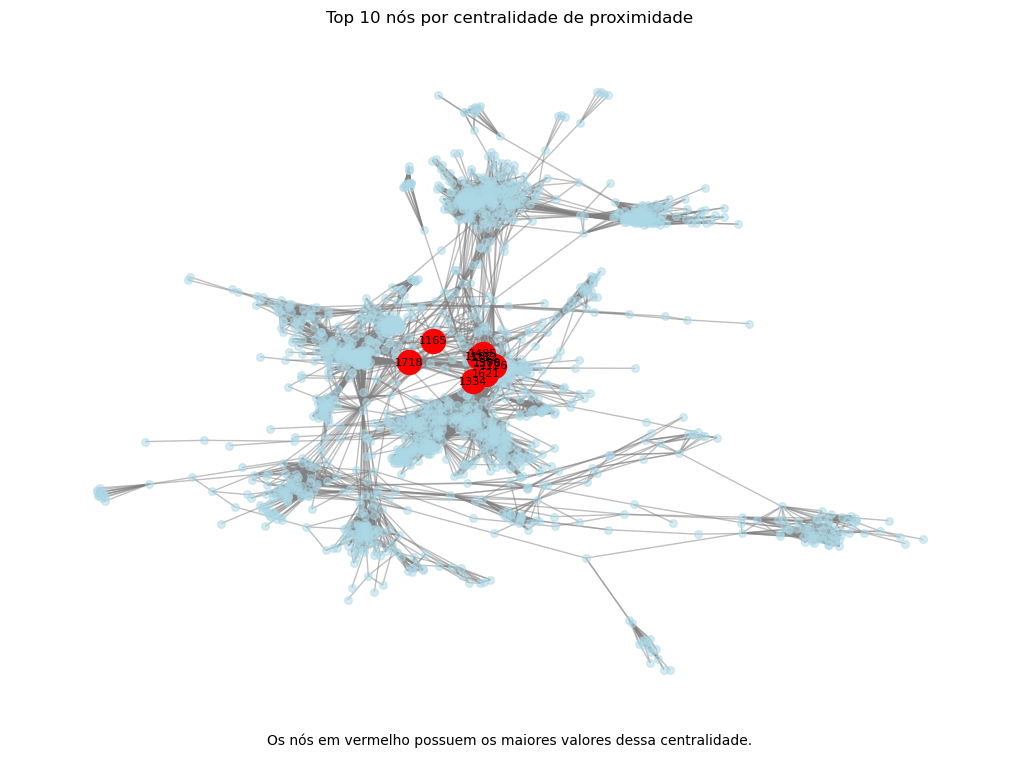

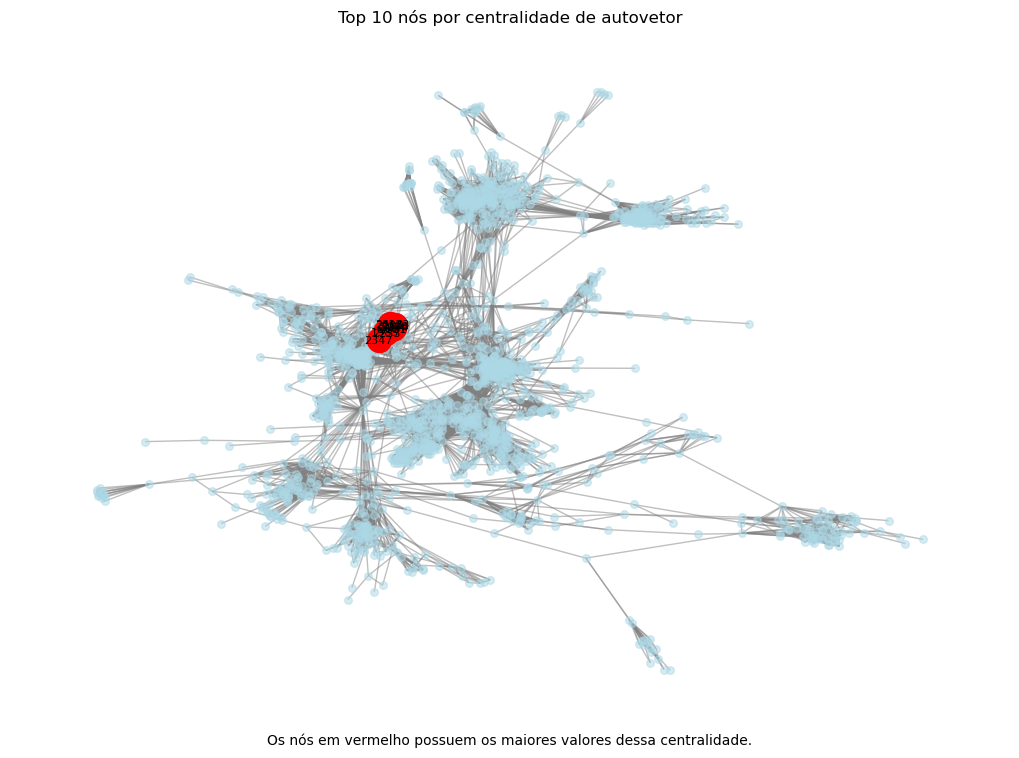

In [26]:

def visualizar_centralidade(G, medidas, tipo, top_k=10):
    valores = medidas[tipo]
    top = sorted(valores.items(), key=lambda x: x[1], reverse=True)[:top_k]
    pos = nx.spring_layout(G, seed=42)
    plt.figure(figsize=(10, 7))
    nx.draw(G, pos, node_color='lightblue', node_size=30, edge_color='gray', alpha=0.5)
    nx.draw_networkx_nodes(G, pos, nodelist=[n for n, _ in top], node_color='red', node_size=300)
    nx.draw_networkx_labels(G, pos, labels={n: f"{n}" for n, _ in top}, font_size=8)
    plt.title(f"Top {top_k} n√≥s por centralidade de {tipo}")
    plt.figtext(0.5, -0.02, "Os n√≥s em vermelho possuem os maiores valores dessa centralidade.", ha="center")
    plt.show()

visualizar_centralidade(G, medidas, tipo="grau")
visualizar_centralidade(G, medidas, tipo="intermediacao")
visualizar_centralidade(G, medidas, tipo="proximidade")
visualizar_centralidade(G, medidas, tipo="autovetor")


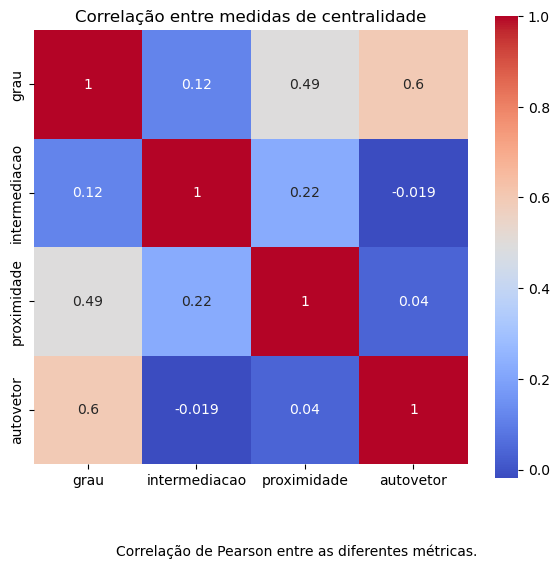

In [20]:

def heatmap_centralidades(medidas):
    df = pd.DataFrame(medidas)
    plt.figure(figsize=(7,6))
    sns.heatmap(df.corr(), annot=True, cmap="coolwarm", square=True)
    plt.title("Correla√ß√£o entre medidas de centralidade")
    plt.figtext(0.5, -0.02, "Correla√ß√£o de Pearson entre as diferentes m√©tricas.", ha="center")
    plt.show()

heatmap_centralidades(medidas)


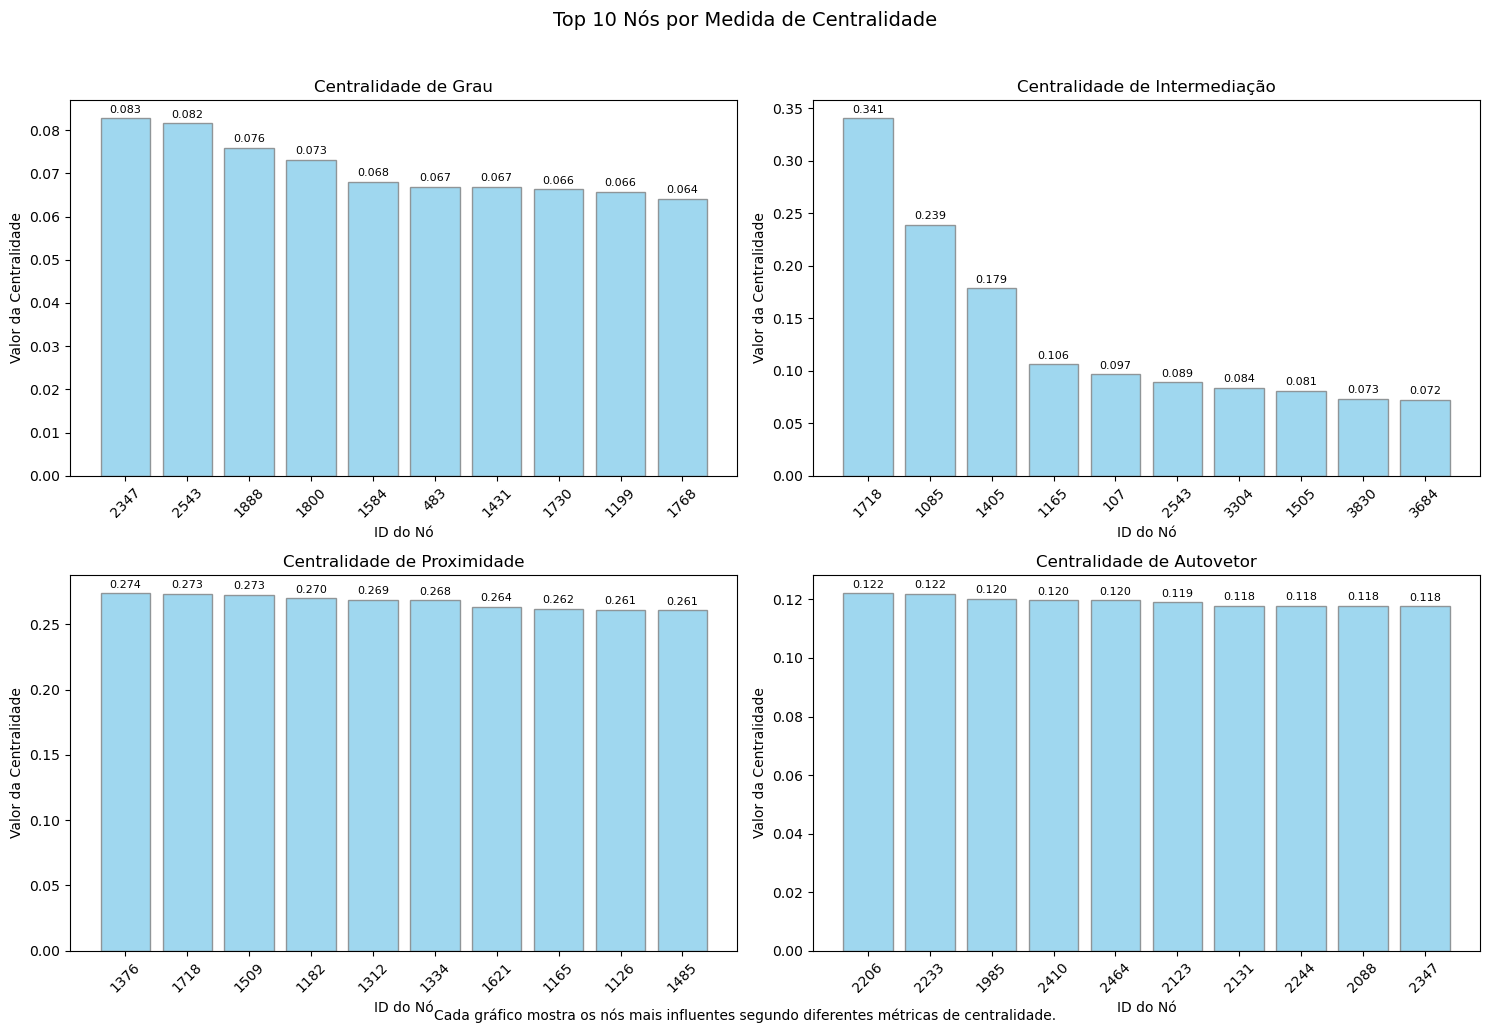

In [ ]:
def criar_grafico_barras_centralidade(medidas, top_k=10):
    """
    Cria gr√°fico de barras para os top n√≥s por cada medida de centralidade.
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    axes = axes.flatten()

    medidas_nomes = ['grau', 'intermediacao', 'proximidade', 'autovetor']
    titulos = [
        'Centralidade de Grau',
        'Centralidade de Intermedia√ß√£o',
        'Centralidade de Proximidade',
        'Centralidade de Autovetor'
    ]

    for i, (nome, titulo) in enumerate(zip(medidas_nomes, titulos)):
        top = sorted(medidas[nome].items(), key=lambda x: x[1], reverse=True)[:top_k]
        nos = [str(n) for n, _ in top]
        valores = [v for _, v in top]
        
        axes[i].bar(nos, valores, color='skyblue', alpha=0.8, edgecolor='gray')
        axes[i].set_title(titulo, fontsize=12)
        axes[i].set_xlabel('ID do N√≥')
        axes[i].set_ylabel('Valor da Centralidade')
        axes[i].tick_params(axis='x', rotation=45)
        
        for j, v in enumerate(valores):
            axes[i].text(j, v + max(valores)*0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=8)

    plt.suptitle("Top 10 N√≥s por Medida de Centralidade", fontsize=14, y=1.02)
    plt.figtext(0.5, 0.01, "Cada gr√°fico mostra os n√≥s mais influentes segundo diferentes m√©tricas de centralidade.", ha="center")
    plt.tight_layout()
    plt.show()

criar_grafico_barras_centralidade(medidas)



## üìä Etapa 6: Relat√≥rio e Interpreta√ß√£o
Resumo textual da an√°lise ‚Äî principais n√≥s, comunidades e interpreta√ß√µes qualitativas.


In [27]:
def gerar_relatorio(G, medidas, comunidades_dict, comunidades_list):
    """
    Gera um relat√≥rio.
    """
    from statistics import mean


    # Resumo geral
    display(pd.DataFrame({
        "M√©trica": ["N√≥s", "Arestas", "Densidade", "Comunidades"],
        "Valor": [
            G.number_of_nodes(),
            G.number_of_edges(),
            round(nx.density(G), 4),
            len(comunidades_list)
        ]
    }))

    # Tamanhos das comunidades
    tamanhos = [len(c) for c in comunidades_list]
    resumo_comunidades = {
        "Maior comunidade": max(tamanhos),
        "Menor comunidade": min(tamanhos),
        "Tamanho m√©dio": round(mean(tamanhos), 2)
    }
    print("\n Estat√≠sticas de Comunidades:")
    for k, v in resumo_comunidades.items():
        print(f" - {k}: {v} n√≥s")

    # N√≥s mais influentes por medida
    print("\n Top 5 N√≥s Mais Influentes por Medida:")
    for nome, valores in medidas.items():
        top5 = sorted(valores.items(), key=lambda x: x[1], reverse=True)[:5]
        print(f"\n {nome.title()}")
        for i, (n, v) in enumerate(top5, 1):
            print(f"   {i}. N√≥ {n} ‚Äî valor={v:.4f}, comunidade={comunidades_dict.get(n)}")


gerar_relatorio(G, medidas, comunidades_dict, comunidades)


M√©trica       Valor
0          N√≥s   1765.0000
1      Arestas  21625.0000
2    Densidade      0.0139
3  Comunidades     21.0000


 Estat√≠sticas de Comunidades:
 - Maior comunidade: 278 n√≥s
 - Menor comunidade: 7 n√≥s
 - Tamanho m√©dio: 84.05 n√≥s

 Top 5 N√≥s Mais Influentes por Medida:

 Grau
   1. N√≥ 2347 ‚Äî valor=0.0828, comunidade=9
   2. N√≥ 2543 ‚Äî valor=0.0816, comunidade=10
   3. N√≥ 1888 ‚Äî valor=0.0760, comunidade=4
   4. N√≥ 1800 ‚Äî valor=0.0731, comunidade=4
   5. N√≥ 1584 ‚Äî valor=0.0680, comunidade=4

 Intermediacao
   1. N√≥ 1718 ‚Äî valor=0.3405, comunidade=10
   2. N√≥ 1085 ‚Äî valor=0.2388, comunidade=18
   3. N√≥ 1405 ‚Äî valor=0.1787, comunidade=4
   4. N√≥ 1165 ‚Äî valor=0.1062, comunidade=18
   5. N√≥ 107 ‚Äî valor=0.0965, comunidade=15

 Proximidade
   1. N√≥ 1376 ‚Äî valor=0.2740, comunidade=4
   2. N√≥ 1718 ‚Äî valor=0.2734, comunidade=10
   3. N√≥ 1509 ‚Äî valor=0.2728, comunidade=4
   4. N√≥ 1182 ‚Äî valor=0.2702, comunidade=4
   5. N√≥ 1312 ‚Äî valor=0.2689, comunidade=4

 Autovetor
   1. N√≥ 2206 ‚Äî valor=0.1221, comunidade=9
   2. N√≥ 2233 ‚Äî valor=0.1219, comunidade=9
   